# TRM Price Analysis and Forecasting

Universidad Externado de Colombia 
FIGRI
Finanzas Computacionales
Proyecto Final
Mariangel Mantilla, Jose Obando, Sebastian Prieto.

In [ ]:
# Implementation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install --quiet yfinance
import yfinance as yf
import datetime as dt
import time
import warnings
warnings.filterwarnings('ignore')

     |████████████████████████████████| 62 kB 1.2 MB/s 


[*********************100%***********************]  1 of 1 completed


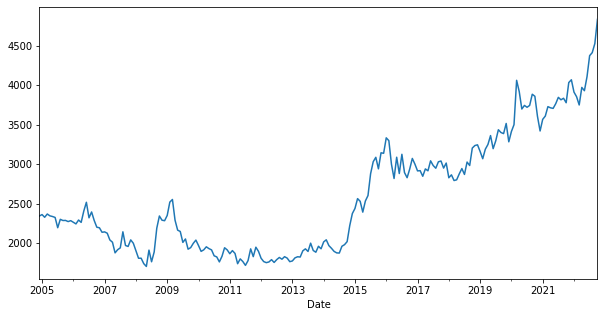

In [ ]:
# Información histórica 
precios = yf.download("COP=X",start="2004-12-01",end="2022-11-01",interval="1Mo")['Adj Close'].dropna()
retornos = np.log(precios/precios.shift(1)).dropna()
precios.plot(figsize=(10,5));

En este punto, se ha buscado los precios historicos de la TRM, esto nos muestra un panorama de la tendencia que ha tenido la TRM desde el año 2005 al 2021, es asi como podemos notar que desde el año 2015 la TRM a incremementado su valor con subidas pronunciadas de su precio alcanzando niveles maximos por encima de los 4500 para el año 2022. 
 
 Todos los datos fueron obtenidos de Yahoo Finance

#### Unit Root Process: Augmented Dickey-Fullar test

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.api import acf, pacf, graphics
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
diferenciaprecios=(precios-precios.shift(1)).dropna()

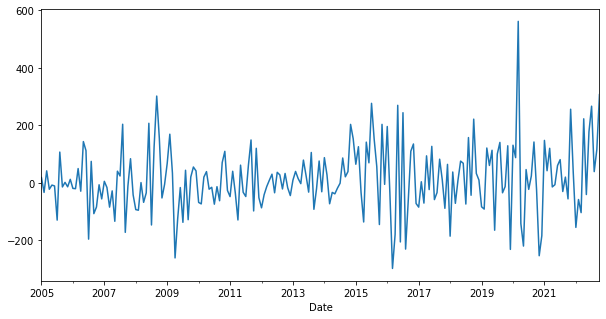

In [ ]:
diferenciaprecios.plot(figsize=(10,5));

Ahora bien, con respecto a la diferencia de precios podemos confirmar lo planteado en los precios historicos de la TRM, dado que desde el 2015 se ha visto una alta variacion de los niveles de diferencia del precio, alcanzando una alta movildad para el 2020 y 2021, alcanzando niveles de diferencia de 600 y -200. Esto se plantea con el fin de pronosticar la serie estacionaria, puesto que esto nos permite identificar como se comportaba de una manera en el pasado y si se podria seguir comportando de la misma forma en el futuro.

Todos los datos fueron obtenidos de Yahoo Finance

In [ ]:
pruebadf = adfuller(diferenciaprecios)
print("ADF test: %f" % pruebadf[0])
print("P-value: %f" % pruebadf[1])
print("Citical values:")
for key, value in pruebadf[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -15.118313
P-value: 0.000000
Citical values:
	1%: -3.461282
	5%: -2.875143
	10%: -2.574020


El P-valor es menor a la significancia lo que significa que la variable es estacionaria y se puede proceder con el ARIMA
Tanto en niveles de confianza del 1% , 5% y 10%

### 3. ARIMA Model

In [ ]:
resDiff = sm.tsa.arma_order_select_ic(diferenciaprecios, ic='aic', trend="nc")
resDiff

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


{'aic':              0            1            2
 0          NaN  2644.692111  2646.558232
 1  2644.718928  2646.513748  2648.486539
 2  2646.604305  2648.478572  2649.727577
 3  2648.078773  2650.078123  2643.990096
 4  2650.076628  2650.172524  2644.327762, 'aic_min_order': (3, 2)}

La anterior prueba sugiere usar un ARIMA de orden (3,1,2)
es decir que la variable depende de 3 valores atras de la misma varibale
y de de orden 2 de media movil es decir una varible puede depender de hasta dos errores de sus observaciones pasadas.

La prueba sugiere un modelo AR(1) y MA(1). Nota: un proceso MA siempre es un proceso estacionario.:

In [ ]:
ARIMA_01 = ARIMA(precios, order=(3, 1, 2)).fit()
print(ARIMA_01.summary());
#ARIMA_01.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                  216
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1323.314
Date:                Sun, 20 Nov 2022   AIC                           2658.628
Time:                        16:58:51   BIC                           2678.852
Sample:                    12-01-2004   HQIC                          2666.799
                         - 11-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2877      0.088      3.271      0.001       0.115       0.460
ar.L2         -0.8569      0.081    -10.603      0.000      -1.015      -0.698
ar.L3         -0.1042      0.060     -1.751      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


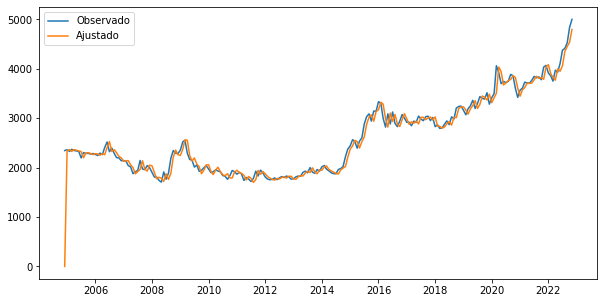

In [ ]:
# Ajuste del modelo
fit_arima = ARIMA_01.predict()   # Ajuste del modelo
plt.figure(figsize=(10, 5))
plt.plot(precios, label="Observado")
plt.plot(fit_arima, label="Ajustado")
plt.legend(loc="upper left")
plt.show()

En esta grafica se puede denotar que el modelo ARIMA es el que mejor se ajusta a los datos historicos

In [ ]:
predict_arima = ARIMA_01.forecast(12)
predict_arima = pd.DataFrame(predict_arima.values)
print(predict_arima.iloc[-1,:])
#predict_arima

0    4994.252904
Name: 11, dtype: float64


Se puede observar que dentro de un año el pronostico de la TRM es de 4994 pesos 

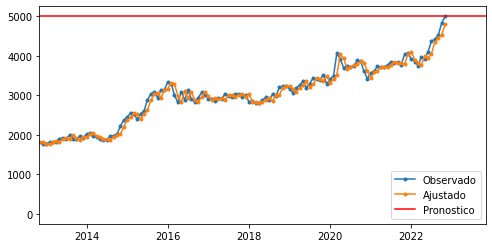

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(precios, marker=".", label="Observado")
plt.plot(fit_arima, marker=".", label="Ajustado")
plt.axhline(predict_arima.iloc[1,0], color='r', label="Pronostico")
plt.xlim(dt.datetime(2012, 11, 1), dt.datetime(2023, 11, 1))
plt.legend(loc="lower right")
plt.show()

Es un pronostico que se ajusta muy bien a las valores que se pueden ver hoy en dia en la TRM

Hectareas 

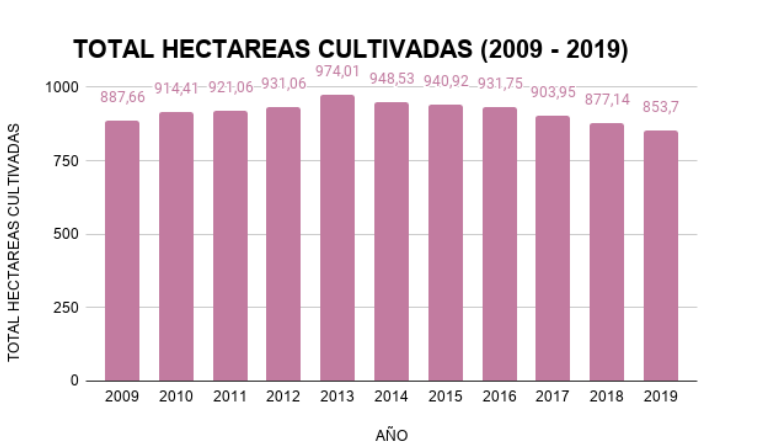

Esta investigación fue realizada por: Gómez, A.,García, J. (2020). La relación de la tasa de cambio en las exportaciones de café en Colombia (2.009 - 2.019). En Universidad Antonio Nariño. Recuperado de: http://repositorio.uan.edu.co/bitstream/123456789/2816/1/2020AnaMar%C3%ADaG%C3%B3mezCifuentes.pdf. pagína 22


In [ ]:
hectareas=(887.66,914.41,921.06,931.06,974.01,948.53,940.92,931.75,903.95,877.14,853.7)

Se tomo los datos del histograma previamnete ilustrado, para con ello poder pronosticar cuantas hectareas debe producirse dependiendo de una TRM. Por ende,
los datos se ingresan a un vector para de forma poder operarlos, mas, se puede evidenciar que en los años donde aumento la TRM hubo una disminución de las hectareas producidas. Entonces, seguramnete estas dos variables vana tener una relación inversa.

In [ ]:
precios1 = yf.download("COP=X",start="2008-12-01",end="2009-12-31",interval="1Mo")['Adj Close'].dropna()

precios2 = yf.download("COP=X",start="2009-12-01",end="2010-12-31",interval="1Mo")['Adj Close'].dropna()

precios3 = yf.download("COP=X",start="2010-12-01",end="2011-12-31",interval="1Mo")['Adj Close'].dropna()

precios4 = yf.download("COP=X",start="2011-12-01",end="2012-12-31",interval="1Mo")['Adj Close'].dropna()

precios5 = yf.download("COP=X",start="2012-12-01",end="2013-12-31",interval="1Mo")['Adj Close'].dropna()

precios6 = yf.download("COP=X",start="2013-12-01",end="2014-12-31",interval="1Mo")['Adj Close'].dropna()

precios7 = yf.download("COP=X",start="2014-12-01",end="2015-12-31",interval="1Mo")['Adj Close'].dropna()

precios8 = yf.download("COP=X",start="2015-12-01",end="2016-12-31",interval="1Mo")['Adj Close'].dropna()

precios9 = yf.download("COP=X",start="2017-12-01",end="2018-12-31",interval="1Mo")['Adj Close'].dropna()

precios10 = yf.download("COP=X",start="2018-12-01",end="2019-12-31",interval="1Mo")['Adj Close'].dropna()

precios11 = yf.download("COP=X",start="2019-12-01",end="2020-12-31",interval="1Mo")['Adj Close'].dropna()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
mean1 = precios1.mean()
mean2 = precios2.mean()
mean3 = precios3.mean()
mean4 = precios4.mean()
mean5 = precios5.mean()
mean6 = precios6.mean()
mean7 = precios7.mean()
mean8 = precios8.mean()
mean9 = precios9.mean()
mean10 = precios10.mean()
mean11 = precios11.mean()

Acá se halla el promedio anual de la TRM por cada año, con ello poder utilizar esa información para realizar un modelo MCO. 

In [ ]:
CTRM=(mean1,mean2,mean3,mean4,mean5,mean6,mean7,mean8,mean9,mean10,mean11)

Por lo consiguiente se concatena los datos obtenidos, para realizar de forma adecuado la regresión lineal.

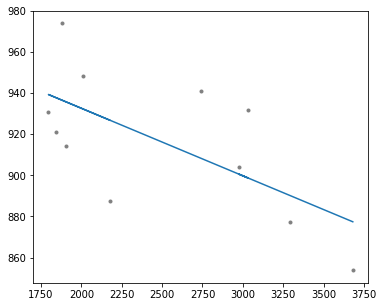

In [ ]:
from scipy import stats
slope, intercept, r, p, std_err = stats.linregress(CTRM, hectareas)
def linestim(x):
  return intercept + slope * x

model = list(map(linestim, CTRM))
fig = plt.figure(figsize = (6, 5))
ax = fig.add_subplot()
plt.plot(CTRM, hectareas, ".", color = 'gray')
plt.plot(CTRM, model)
plt.show()

In [ ]:
print(intercept,slope)

998.4227529066725 -0.0328775445445162


Despues de hallar la regresión se evidencia que si la TRM aumenta un dolar, la producción de hectarias tiene que disminuir en 0.033. Por ende, la hipotesis que se tenía previamente desde el histograma se cumple, ya que entre mayor TRM menores hectareas se deben producir.


In [ ]:
linestim(predict_arima.iloc[-1,:])

0    834.223981
Name: 11, dtype: float64

In [ ]:
linestim(mean4)

939.3706364994447

En resumidas cuentas, se realizó un pronostico de la TRM para noviembre de 2023, ya que en ese mes es donde los cafeteros realizan su recolecta. Por lo consiguiente, se evidencia por medio del modelo de minimos cuadrados ordinarios que, cuando la TRM esta al alza los exportadores deben producir menos hectareas, ya que ellos importan los insumos y sus materias primas, lo que conlleva a costos mayores. En conclusión, realmente se comprueva una relación inversa entre la TRM y las hectareas producidas, por eso para 2023 con una TRM de 4994 se debe producir 834 hectareas, 105 hectareas menos que en el año 2011-2012 que tuvo que haber sido de 939 hectareas producidas, donde la TRM promedio fue de 1796.
